# Closed Deals - Marketing Funnel Analysis

## 1. Overview 

### Objective
This project analyzes the performance of closed deals to identify key insights into lead sources, business segments, and revenue performance.

### Goal
1. Understand lead origin performance and identify top-performing sources.
2. Analyze revenue contributions by business segments.
3. Visualize revenue distribution and identify patterns in closed deals.
4. Provide actionable recommendations for optimizing lead acquisition and revenue growth.


### Dataset Detail
This dataset was taken from Kaggle and was provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract.he project uses two datasets:

**olist_marketing_qualified_leads_dataset.csv:**
Contains information about leads entering the marketing funnel.

 **Key columns:**
- **mql_id:** Unique identifier for each lead.
- **first_contact_date:** Date when the lead interacted with the business.
- **origin:** Source of the lead (e.g., paid_search, organic_search, social_media).
  

**olist_closed_deals_dataset.csv:**
Contains data about deals that were closed.
 
**Key columns:**
- **mql_id:** Unique identifier for each lead.
- **won_date:** Date when the deal was closed.
- **business_segment:** Segment of the lead (e.g., food_drink, home_appliances).
- **declared_monthly_revenue:** Monthly revenue declared by the business.

## 2.Funnel Stages

### Stages Overview
The funnel stages vary based on two important types:

- **Lead Generation:**
Represents users from the olist_marketing_qualified_leads_dataset.
These are potential customers who have shown interest in the service or product.

- **Deal Closure:**
Represents users from the olist_closed_deals_dataset.
These are leads who were successfully converted into paying customers.


## 3. Data Preparation

### Load Data in Python

In [112]:
# Import libraries
!pip install squarify
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import squarify


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [113]:
# Load the dataset
qualified_leads_df = pd.read_csv('olist_marketing_qualified_leads_dataset.csv')
closed_deals_df = pd.read_csv('olist_closed_deals_dataset.csv')

# Inspect datasets
print("Qualified Leads Info:\n", qualified_leads_df.info())
print("\nClosed Deals Info:\n", closed_deals_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB
Qualified Leads Info:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   busine

In [114]:
# Merge datasets on 'mql_id'
merged_df = pd.merge(qualified_leads_df, closed_deals_df, on = 'mql_id', how = 'inner')

# Display the merged dataset
print("\nFirst few rows of merged dataset:")
merged_df.head()


First few rows of merged dataset:


,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [115]:
# Inspect the merged dataset
print("\nShow Merged Dataset info")
merged_df.info()


Show Merged Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   first_contact_date             842 non-null    object 
 2   landing_page_id                842 non-null    object 
 3   origin                         828 non-null    object 
 4   seller_id                      842 non-null    object 
 5   sdr_id                         842 non-null    object 
 6   sr_id                          842 non-null    object 
 7   won_date                       842 non-null    object 
 8   business_segment               841 non-null    object 
 9   lead_type                      836 non-null    object 
 10  lead_behaviour_profile         665 non-null    object 
 11  has_company                    63 non-null     object 
 12  has_gtin                

In [116]:
# Check the rows with missing leads
missing_won_date = merged_df[merged_df['won_date'].isnull()]
print(f"Number of rows with missing won date: {[missing_won_date]}")

Number of rows with missing won date: [Empty DataFrame
Columns: [mql_id, first_contact_date, landing_page_id, origin, seller_id, sdr_id, sr_id, won_date, business_segment, lead_type, lead_behaviour_profile, has_company, has_gtin, average_stock, business_type, declared_product_catalog_size, declared_monthly_revenue]
Index: []]


In [117]:
# Add Funnel Stages
merged_df['FunnelStage'] = 'Lead Generation'
merged_df.loc[merged_df['won_date'].notnull(), 'FunnelStage'] = 'Deal Closure'

# Inspect the Data 
print(merged_df['FunnelStage'].value_counts())

FunnelStage
Deal Closure    842
Name: count, dtype: int64


In [118]:
# Save the merged dataset for reuse
merged_df.to_csv('merged_funnel_dataset.csv', index=False)

### Caluclations in SQL

1. Load the merged dataset into an SQLite database.
2. Perform SQL queries to derive insights:
   - Closed deals by origin.
   - Revenue by business segment.
   - Average revenue per deal by origin.
   - Average time to close a deal.

In [120]:
# Create SQLite database
connection = sqlite3.connect('closed_deals_analysis.db')

In [121]:
# Load the merged dataset into SQLite
merged_df.to_sql("closed_deals", connection, index=False, if_exists="replace")

# Verify the table is loaded
tables = connection.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
print("Tables in SQLite Database:", tables)

Tables in SQLite Database: [('closed_deals',)]


## 4. SQL queries

#### Closed Deals by Origin

In [123]:
# Closed Deals by Origin
query_1 = """
SELECT origin, COUNT(*) AS closed_deals
FROM closed_deals
WHERE FunnelStage = 'Deal Closure'
GROUP BY origin
ORDER BY closed_deals DESC;
"""

closed_deals_by_origin = pd.read_sql_query(query_1, connection)
print("\nClosed Deals by Origin:\n", closed_deals_by_origin)


Closed Deals by Origin:
                origin  closed_deals
0      organic_search           271
1         paid_search           195
2             unknown           179
3              social            75
4      direct_traffic            56
5            referral            24
6               email            15
7                None            14
8             display             6
9               other             4
10  other_publicities             3


#### Revenue by Business Segment

In [125]:
# Revenue by Business Segment
query_2 = """
SELECT business_segment, SUM(declared_monthly_revenue) AS total_revenue
FROM closed_deals
WHERE FunnelStage = 'Deal Closure'
GROUP BY business_segment
ORDER BY total_revenue DESC
LIMIT 10;
"""
revenue_by_segment = pd.read_sql_query(query_2, connection)
print("\nRevenue by Business Segment:")
print(revenue_by_segment)


Revenue by Business Segment:
                  business_segment  total_revenue
0  construction_tools_house_garden     50695006.0
1                     phone_mobile      8000000.0
2                       home_decor       710000.0
3                            other       626000.0
4                              pet       300000.0
5                    health_beauty       295000.0
6          audio_video_electronics       270000.0
7                             toys       259000.0
8                  car_accessories       185000.0
9              household_utilities       163000.0


#### Average Revenue Per Deal

In [127]:
# Average Revenue Per Deal
query_3 = """
SELECT origin, AVG(declared_monthly_revenue) AS average_revenue
FROM closed_deals
WHERE FunnelStage = 'Deal Closure'
GROUP BY origin
ORDER BY average_revenue DESC
LIMIT 10;
"""
average_revenue = pd.read_sql_query(query_3, connection)
print("\nAverage Revenue Per Deal:\n", average_revenue)


Average Revenue Per Deal:
               origin  average_revenue
0     organic_search    189763.837638
1        paid_search     47020.512821
2               None     10714.285714
3             social      6680.000000
4            unknown      2586.625698
5     direct_traffic      1071.428571
6              email      1000.000000
7           referral         0.000000
8  other_publicities         0.000000
9              other         0.000000


#### Average time to close a deal

In [129]:
# Average time to close a deal
query_4 = """
SELECT AVG(julianday(won_date) - julianday(first_contact_date)) AS avg_days_to_close
FROM closed_deals
WHERE FunnelStage = 'Deal Closure';
"""
avg_days_to_close = pd.read_sql_query(query_4, connection)
print("\nAverage Days to Close a Deal:")
print(avg_days_to_close)


Average Days to Close a Deal:
   avg_days_to_close
0          49.100769


## 5. Visualization

1. Bar chart for closed deals by origin.
2. Horizontal bar chart for revenue by business segment.
3. Treemap for Average Revenue Per Deal.
4. Single Metric Card for Average time to close a deal.

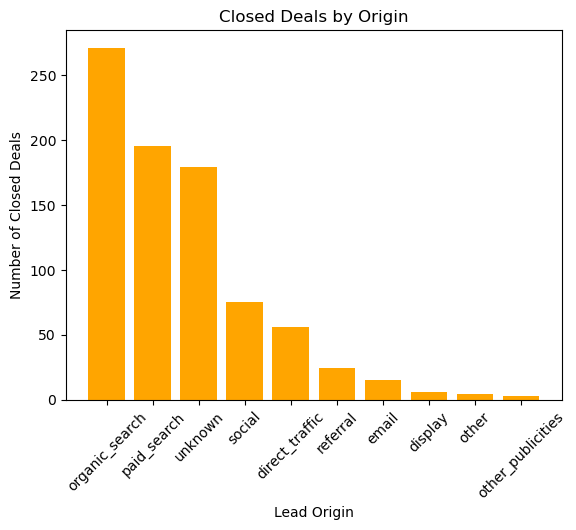

In [131]:
# Bar chart for closed deals by origin
# Simplify and reset index
if isinstance(closed_deals_by_origin, pd.Series):
    closed_deals_by_origin = closed_deals_by_origin.reset_index()
    closed_deals_by_origin.columns = ['origin', 'closed_deals']

# Drop null values
closed_deals_by_origin.dropna(inplace=True)

# Ensure lengths match
if len(closed_deals_by_origin['origin']) == len(closed_deals_by_origin['closed_deals']):
    # Plot the bar chart
    plt.bar(closed_deals_by_origin['origin'], closed_deals_by_origin['closed_deals'], color='orange')
    plt.title('Closed Deals by Origin')
    plt.xlabel('Lead Origin')
    plt.ylabel('Number of Closed Deals')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Error: Mismatch in x and y lengths.")

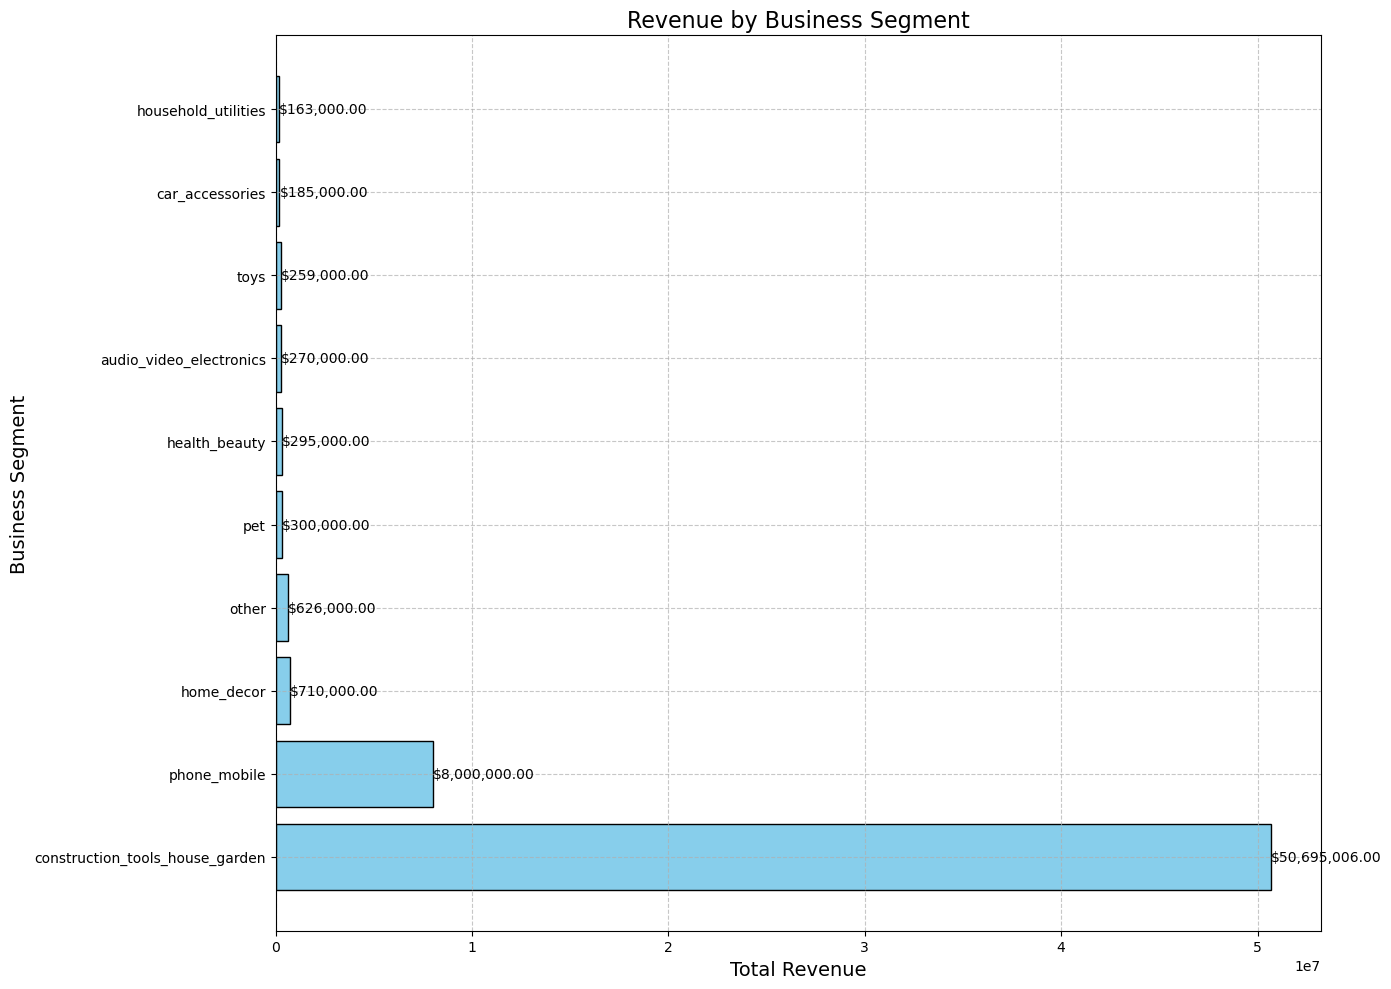

In [132]:
# Plot horizontal bar chart for Revenue by Business Segment
plt.figure(figsize=(14,10))

# Plot the horizontal bar chart
plt.barh(
    revenue_by_segment['business_segment'],
    revenue_by_segment['total_revenue'],
    color='skyblue',
    edgecolor='black'
)

# Chart details
plt.title('Revenue by Business Segment', fontsize=16)
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Business Segment', fontsize=14)
plt.grid('x', linestyle='--', alpha=0.7)


# Anotate each bar with its revenue value
for index, value in enumerate(revenue_by_segment['total_revenue']):
    plt.text(
        value,
        index,
        f'${value:,.2f}',
        va='center',
        ha='left',
        fontsize=10
        )
        
# Adust the layout to fit neatly
plt.tight_layout()

# Display the plot
plt.show()

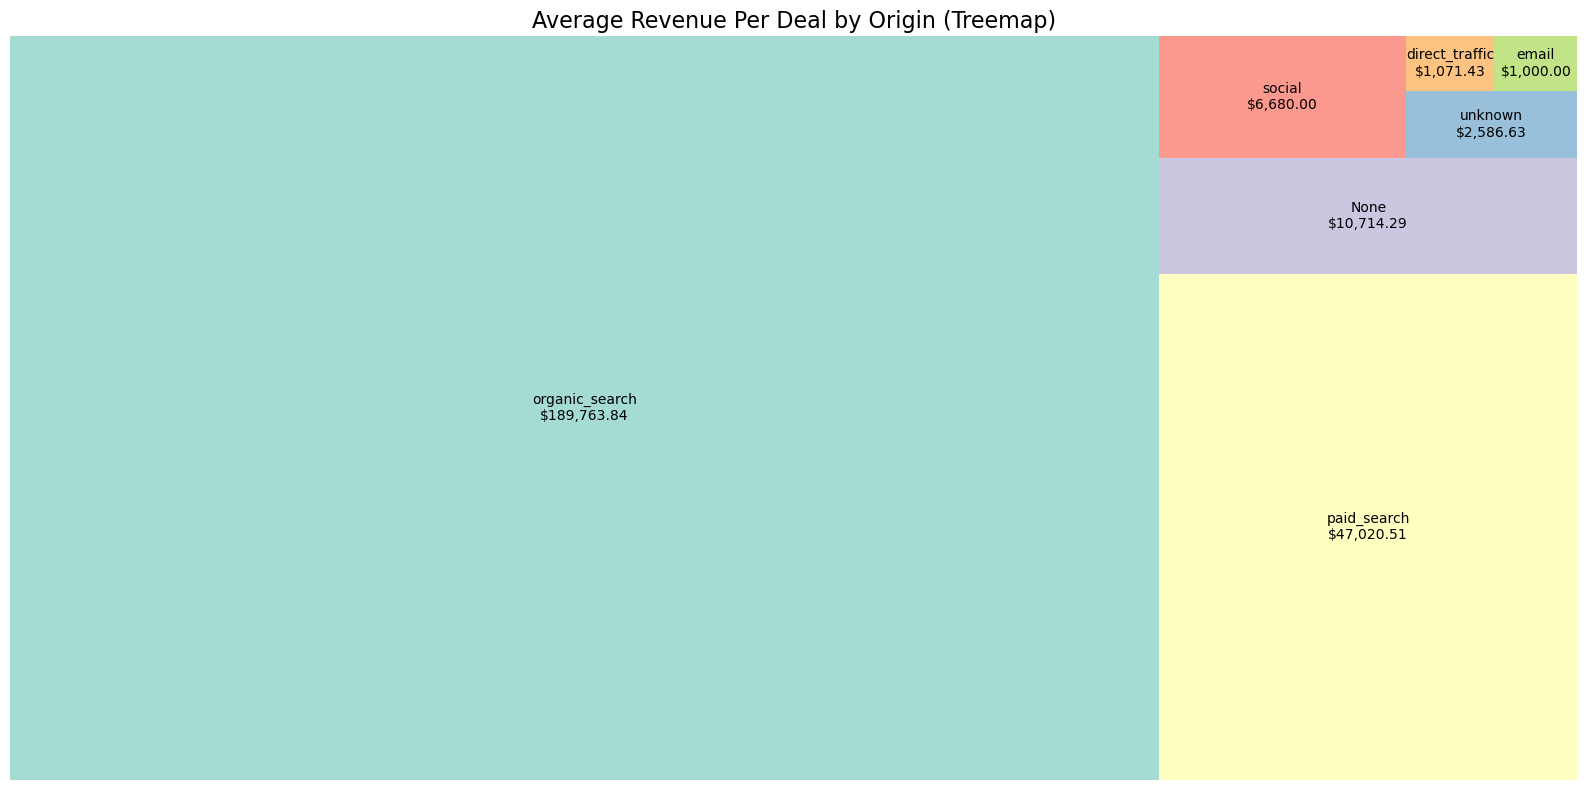

In [133]:
# Filter out rows with zero or null average revenue
filtered_data = average_revenue[average_revenue['average_revenue'] > 0]

# Treemap for Average Revenue Per Deal
plt.figure(figsize=(16, 8))
squarify.plot(
    sizes=filtered_data['average_revenue'],  # Use filtered data
    label=[f"{origin}\n${revenue:,.2f}" for origin, revenue in zip(filtered_data['origin'], filtered_data['average_revenue'])],
    alpha=0.8,  # Transparency
    color=plt.cm.Set3.colors[:len(filtered_data)]  # Distinct colors
)

# Add title
plt.title('Average Revenue Per Deal by Origin (Treemap)', fontsize=16)
plt.axis('off')  # Remove axes
plt.tight_layout()
plt.show()


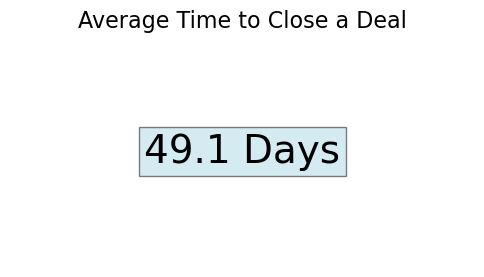

In [134]:
# Single Metric Card
plt.figure(figsize=(6, 3))
plt.text(0.5, 0.5, f'{avg_days:.1f} Days', ha='center', va='center', fontsize=28, bbox=dict(facecolor='lightblue', alpha=0.5))
plt.title('Average Time to Close a Deal', fontsize=16)
plt.axis('off')
plt.show()


## 6. Conclusion

The analysis provided insights into various aspects of closed deals and sales performance, including Closed Deals by Origin, Revenue by Business Segment, Average Revenue Per Deal, and Time to Close Deals.

### Closed Deals by Origin
- Organic Search recorded the highest number of closed deals, showcasing the effectiveness of SEO and search-related digital marketing campaigns.
- Paid Search followed Organic Search and significantly contributed to the total closed deals, indicating strong performance from paid campaigns.

### Revenue by Business Segment
- **Construction Tools** generated the highest revenue of **\$50,695,006**, establishing itself as the most profitable segment.
- **Household Utilities** contributed only **\$163,000**, making it the least profitable segment.
- The disparity in revenue across segments suggests untapped opportunities for growth in underperforming categories.

### Average Revenue Per Deal
- Organic Search had the highest average revenue per deal at **\$189,763.84**, emphasizing the quality of SEO-driven leads.
- Email campaigns had the lowest average revenue per deal at **\$1,000**, indicating inefficiencies in targeting or lead conversion.

### Time to Close Deals
- The average time to close a deal was **49.1 days**, as observed from the analysis.
- A more detailed breakdown of the sales cycle could identify specific stages causing delays and highlight areas for optimization.

### Overall Funnel Performance
The funnel is performing effectively by leveraging Organic and Paid Search to secure high-revenue deals.However, some origins and segments, such as Household Utilities and Email, show lower performance, indicating potential inefficiencies or misaligned strategies.

## 7. Recommendation

1. **Enhancing Top Performers**:
   - Investing in Organic Search campaigns and the Construction Tools segment can help in maximizing returns.

2. **Optimizing Underperformers**:
   - Improving Email campaigns and focus on strategies to boost Household Utilities' performance.

3. **Streamlining Sales Cycle**:
   - Shortening the average deal closure time can help in addressing bottlenecks and implementing CRM tools.

4. **Leveraging Insights**:
   - Using predictive analytics is beneficial for prioritizing high-potential leads and refine strategies for low-performing origins.